In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading in the file
df = pd.read_excel('Ad_Data.xlsx')

In [4]:
# previewing the data
df.head()

,Reporting Starts,Reporting Ends,Ad Name,Test Cell,Creative Value Proposition,Creative Tonality,Creative Design Style,Setting: Bid Type,Audience: Age,Audience: Gender,Reach,Amount Spent (USD),Impressions,Link Clicks [1 Day After Clicking],Purchases - View Based [Post Exposure to the Ad],Purchases - Click Based [Post Clicking on the Ad (subset of View Based)],3-Second Video Views,10-Second Video Views
0,2017-01-17,2017-01-17,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,13-17,female,0,0.00,1,0,0,0,0,0.0
1,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,female,69747,1434.70,123714,104,168,0,7470,1540.0
2,2017-01-15,2017-01-15,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,female,53177,966.88,89734,73,128,0,6111,1457.0
3,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,45-54,female,34362,665.78,51667,48,91,0,5488,1066.0
4,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,male,50487,1077.05,91098,88,115,0,5260,1105.0


In [5]:
# checking number of cvp values
df['Creative Value Proposition'].value_counts()

Speed                                 651
Ubiquity                              650
Simplicity                            649
All 3: Speed, Simplicity, Ubiquity    163
Name: Creative Value Proposition, dtype: int64

In [6]:
# dataframe shape
df.shape

(2113, 18)

In [7]:
# checking for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 18 columns):
Reporting Starts                                                            2113 non-null datetime64[ns]
Reporting Ends                                                              2113 non-null datetime64[ns]
Ad Name                                                                     2113 non-null object
Test Cell                                                                   2113 non-null object
Creative Value Proposition                                                  2113 non-null object
Creative Tonality                                                           2113 non-null object
Creative Design Style                                                       2113 non-null object
Setting: Bid Type                                                           2113 non-null object
Audience: Age                                                               2113 non-null object
Audi

In [8]:
# feature engineering cost per purchase
df['CPP'] = df['Amount Spent (USD)']/(df['Purchases - View Based [Post Exposure to the Ad]']+
                                      df['Purchases - Click Based [Post Clicking on the Ad (subset of View Based)]'])

In [9]:
# feature engineering cost per impression, cost per link click, cost per 3 second video view, cost per 10 second video view
# and cost per reach
df['CPImp'] = df['Amount Spent (USD)']/df['Impressions']
df['CPLC'] = df['Amount Spent (USD)']/df['Link Clicks [1 Day After Clicking]']
df['CP3V'] = df['Amount Spent (USD)']/df['3-Second Video Views']
df['CP10V'] = df['Amount Spent (USD)']/df['10-Second Video Views']
df['CPR'] = df['Amount Spent (USD)']/df['Reach']

In [10]:
df.head()

,Reporting Starts,Reporting Ends,Ad Name,Test Cell,Creative Value Proposition,Creative Tonality,Creative Design Style,Setting: Bid Type,Audience: Age,Audience: Gender,...,Purchases - View Based [Post Exposure to the Ad],Purchases - Click Based [Post Clicking on the Ad (subset of View Based)],3-Second Video Views,10-Second Video Views,CPP,CPImp,CPLC,CP3V,CP10V,CPR
0,2017-01-17,2017-01-17,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,13-17,female,...,0,0,0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN
1,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,female,...,168,0,7470,1540.0,8.539881,0.011597,13.795192,0.192062,0.931623,0.020570
2,2017-01-15,2017-01-15,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,female,...,128,0,6111,1457.0,7.553750,0.010775,13.244932,0.158220,0.663610,0.018182
3,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,45-54,female,...,91,0,5488,1066.0,7.316264,0.012886,13.870417,0.121316,0.624559,0.019375
4,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,male,...,115,0,5260,1105.0,9.365652,0.011823,12.239205,0.204762,0.974706,0.021333


In [11]:
# filtering dataframe for when view based purchases equals 0. quite a lot
df[df['Purchases - View Based [Post Exposure to the Ad]'] == 0]

,Reporting Starts,Reporting Ends,Ad Name,Test Cell,Creative Value Proposition,Creative Tonality,Creative Design Style,Setting: Bid Type,Audience: Age,Audience: Gender,...,Purchases - View Based [Post Exposure to the Ad],Purchases - Click Based [Post Clicking on the Ad (subset of View Based)],3-Second Video Views,10-Second Video Views,CPP,CPImp,CPLC,CP3V,CP10V,CPR
0,2017-01-17,2017-01-17,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,13-17,female,...,0,0,0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN
65,2017-01-14,2017-01-14,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,55-64,male,...,0,0,967,235.0,inf,0.014012,9.465000,0.078304,0.322213,0.015677
67,2017-01-15,2017-01-15,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,Conversion,65+,male,...,0,0,844,305.0,inf,0.038458,11.549000,0.136836,0.378656,0.044013
85,2017-01-16,2017-01-16,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,Conversion,65+,male,...,0,0,201,86.0,inf,0.050236,6.731667,0.200945,0.469651,0.050997
92,2017-01-18,2017-01-18,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,45-54,unknown,...,0,0,98,15.0,inf,0.013617,inf,0.102959,0.672667,0.157656
98,2017-01-18,2017-01-18,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,55-64,unknown,...,0,0,73,9.0,inf,0.014030,6.510000,0.089178,0.723333,0.020344
99,2017-01-15,2017-01-15,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,35-44,unknown,...,0,0,70,17.0,inf,0.011579,inf,0.160286,0.660000,0.025045
100,2017-01-17,2017-01-17,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,55-64,unknown,...,0,0,69,10.0,inf,0.013822,inf,0.087536,0.604000,0.031458
101,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,55-64,unknown,...,0,0,69,5.0,inf,0.013438,inf,0.099130,1.368000,0.015268
103,2017-01-15,2017-01-15,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,45-54,unknown,...,0,0,64,11.0,inf,0.011948,inf,0.100625,0.585455,0.050313


In [12]:
# correlation matrix
df.corr()

,Reach,Amount Spent (USD),Impressions,Link Clicks [1 Day After Clicking],Purchases - View Based [Post Exposure to the Ad],Purchases - Click Based [Post Clicking on the Ad (subset of View Based)],3-Second Video Views,10-Second Video Views,CPP,CPImp,CPLC,CP3V,CP10V,CPR
Reach,1.000000,0.951173,0.982140,0.929145,0.908070,0.246719,0.920537,0.911277,-0.194589,-0.312096,-0.052791,0.005262,0.083625,-0.265433
Amount Spent (USD),0.951173,1.000000,0.966718,0.945692,0.924356,0.249529,0.937073,0.949095,-0.143788,-0.162519,0.027498,0.066276,0.109173,-0.143143
Impressions,0.982140,0.966718,1.000000,0.952511,0.921670,0.237715,0.928826,0.919793,-0.179333,-0.286228,-0.061028,0.005610,0.079269,-0.226267
Link Clicks [1 Day After Clicking],0.929145,0.945692,0.952511,1.000000,0.874154,0.226463,0.911073,0.914741,-0.127003,-0.220000,-0.173441,-0.000346,0.054638,-0.181342
Purchases - View Based [Post Exposure to the Ad],0.908070,0.924356,0.921670,0.874154,1.000000,0.266226,0.854190,0.854941,-0.295255,-0.187066,0.000163,0.069616,0.119619,-0.151136
Purchases - Click Based [Post Clicking on the Ad (subset of View Based)],0.246719,0.249529,0.237715,0.226463,0.266226,1.000000,0.232401,0.231884,-0.111205,-0.034696,0.007954,0.047660,0.060575,-0.038339
3-Second Video Views,0.920537,0.937073,0.928826,0.911073,0.854190,0.232401,1.000000,0.987511,-0.076703,-0.243817,-0.054781,-0.106924,-0.039898,-0.209076
10-Second Video Views,0.911277,0.949095,0.919793,0.914741,0.854941,0.231884,0.987511,1.000000,-0.065470,-0.188594,-0.037665,-0.049012,-0.035252,-0.163622
CPP,-0.194589,-0.143788,-0.179333,-0.127003,-0.295255,-0.111205,-0.076703,-0.065470,1.000000,0.201122,0.013948,-0.173236,-0.240711,0.165624
CPImp,-0.312096,-0.162519,-0.286228,-0.220000,-0.187066,-0.034696,-0.243817,-0.188594,0.201122,1.000000,0.302751,0.393021,0.140452,0.783841


In [13]:
# replacing all infinite values with nans. this allows data to be more easily examined (nans excluded from analysis)
df.CPP = df.CPP.replace([np.inf, -np.inf], np.nan)
df.CPImp = df.CPImp.replace([np.inf, -np.inf], np.nan)                                                                      
df.CPLC = df.CPLC.replace([np.inf, -np.inf], np.nan)
df.CP3V = df.CP3V.replace([np.inf, -np.inf], np.nan)
df.CP10V = df.CP10V.replace([np.inf, -np.inf], np.nan)
df.CPR = df.CPR.replace([np.inf, -np.inf], np.nan)

In [14]:
# feature engineering total purchases column
df['total_purchases'] = df['Purchases - View Based [Post Exposure to the Ad]']+
                            df['Purchases - Click Based [Post Clicking on the Ad (subset of View Based)]']

In [19]:
# can't use nan values in visualizations. aliasing cpp column without nans to a variable to visualize
cpp = df.CPP.dropna()

In [21]:
# checking the number of values
len(cpp)

1297

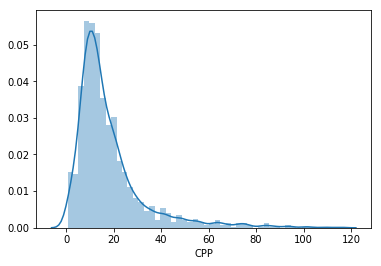

In [20]:
# distribution plot of cost per purchase shows clear positive skew
sns.distplot(cpp)

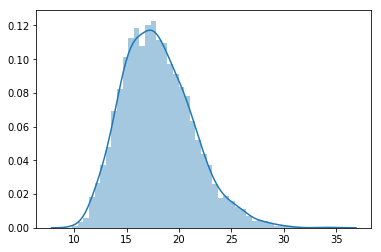

In [36]:
# taking 5000 samples of 20 and finding their means. this normalizes the data according to the central limit theorem
# you can see that in the below distribution chart
cpp_means = []
for x in range(5000):
    sample = cpp.sample(n=20)
    sample_mean = sum(sample)/len(sample)
    cpp_means.append(sample_mean)
sns.distplot(cpp_means)

In [30]:
# looking at basic stats of cpp before normalization
df.CPP.describe()

count    1297.000000
mean       18.115192
std        15.129354
min         0.640000
25%         9.220714
50%        13.560000
75%        21.250769
max       115.280000
Name: CPP, dtype: float64

In [37]:
# and the same after (need to convert to a series to call describe)
# similar means but standard deviation is way lower
pd.Series(cpp_means).describe()

count    5000.000000
mean       17.975392
std         3.362179
min         9.813994
25%        15.524543
50%        17.650304
75%        20.098197
max        34.920566
dtype: float64

In [16]:
# creative value prop cpp basic stats
df.groupby('Creative Value Proposition').CPP.describe()

,count,mean,std,min,25%,50%,75%,max
Creative Value Proposition,,,,,,,,
"All 3: Speed, Simplicity, Ubiquity",122.0,20.373697,17.256362,1.805,9.994992,15.264454,23.619605,95.06
Simplicity,397.0,17.410765,14.621003,0.710,8.620000,12.558889,21.060000,100.82
Speed,392.0,18.755412,15.877901,0.750,9.377730,14.528958,21.681500,115.28
Ubiquity,386.0,17.475693,14.073369,0.640,9.339169,13.319000,20.374750,102.19


In [38]:
# calculating z-stat. very low number demonstrates statistical significance
z = (17.410765 - 18.087597)/(3.362179/np.sqrt(392))
z

-3.985686042852996

In [14]:
# examining cpp averages of creative value props when 0 values are included for comparison
df.groupby('Creative Value Proposition')['Amount Spent (USD)'].sum()/
                                                            df.groupby('Creative Value Proposition').total_purchases.sum()

Creative Value Proposition
All 3: Speed, Simplicity, Ubiquity    11.632653
Simplicity                            11.418492
Speed                                 11.814448
Ubiquity                              11.928084
dtype: float64

In [15]:
# average spend by creative value prop
df.groupby('Creative Value Proposition')['Amount Spent (USD)'].mean()

Creative Value Proposition
All 3: Speed, Simplicity, Ubiquity    277.042699
Simplicity                             68.000724
Speed                                  70.305945
Ubiquity                               70.577554
Name: Amount Spent (USD), dtype: float64

In [40]:
# grouping by all three creative groups, examining basic stats of cpp for those groups and sorting by average, then median
df.groupby(['Creative Value Proposition', 'Creative Tonality', 'Creative Design Style']).CPP.describe().sort_values(
    by=['mean', '50%'])

count  \
Creative Value Proposition         Creative Tonality Creative Design Style          
Simplicity                          Emotional         Graphic               107.0   
                                    Rational          Lifestyle              96.0   
Ubiquity                            Rational          Lifestyle              96.0   
Speed                               Emotional         Lifestyle              95.0   
Ubiquity                            Emotional         Graphic                97.0   
                                                      Lifestyle             101.0   
Speed                               Rational          Lifestyle              99.0   
Ubiquity                            Rational          Graphic                92.0   
Simplicity                          Rational          Graphic                96.0   
Speed                               Rational          Graphic               100.0   
Simplicity                          Emotional         Lifestyle              98.0   
All 3: Speed, Simplicity, Ubiquity  Rational          Graphic               122.0   
Speed                               Emotional         Graphic                98.0   

                                                                                 mean  \
Creative Value Proposition         Creative Tonality Creative Design Style              
Simplicity                          Emotional         Graphic               16.022460   
                                    Rational          Lifestyle             16.343893   
Ubiquity                            Rational          Lifestyle             16.666026   
Speed                               Emotional         Lifestyle             16.942904   
Ubiquity                            Emotional         Graphic               17.300384   
                                                      Lifestyle             17.566927   
Speed                               Rational          Lifestyle             17.898608   
Ubiquity                            Rational          Graphic               18.405238   
Simplicity                          Rational          Graphic               18.552754   
Speed                               Rational          Graphic               18.705138   
Simplicity                          Emotional         Lifestyle             18.852984   
All 3: Speed, Simplicity, Ubiquity  Rational          Graphic               20.373697   
Speed                               Emotional         Graphic               21.429283   

                                                                                  std  \
Creative Value Proposition         Creative Tonality Creative Design Style              
Simplicity                          Emotional         Graphic               14.171046   
                                    Rational          Lifestyle             14.135078   
Ubiquity                            Rational          Lifestyle             12.736572   
Speed                               Emotional         Lifestyle             15.602783   
Ubiquity                            Emotional         Graphic               15.773198   
                                                      Lifestyle             14.143725   
Speed                               Rational          Lifestyle             14.427563   
Ubiquity                            Rational          Graphic               13.590203   
Simplicity                          Rational          Graphic               15.424922   
Speed                               Rational          Graphic               13.625124   
Simplicity                          Emotional         Lifestyle             14.762337   
All 3: Speed, Simplicity, Ubiquity  Rational          Graphic               17.256362   
Speed                               Emotional         Graphic               19.218371   

                                                                              min  \
Creative Value Proposition         Creative

In [17]:
# creating dummy variables for creative categories to check for correlation
cvp_dummies = pd.get_dummies(df['Creative Value Proposition'], prefix='cvp')
ct_dummies = pd.get_dummies(df['Creative Tonality'], prefix='ct')
cds_dummies = pd.get_dummies(df['Creative Design Style'], prefix='cds')

In [18]:
# adding them to the original dataframe
df = pd.concat([df, cvp_dummies, ct_dummies, cds_dummies], axis=1)

In [19]:
# checking unique values in creative design style column
df['Creative Design Style'].unique()

array([' Graphic ', ' Lifestyle '], dtype=object)

In [48]:
# correlation matrix for just cpp. all other cost per metrics have low scores
df.corr().CPP

Reach                                                                      -0.194589
Amount Spent (USD)                                                         -0.143788
Impressions                                                                -0.179333
Link Clicks [1 Day After Clicking]                                         -0.127003
Purchases - View Based [Post Exposure to the Ad]                           -0.295255
Purchases - Click Based [Post Clicking on the Ad (subset of View Based)]   -0.111205
3-Second Video Views                                                       -0.076703
10-Second Video Views                                                      -0.065470
CPP                                                                         1.000000
total_purchases                                                            -0.296333
cvp_All 3: Speed, Simplicity, Ubiquity                                      0.048120
cvp_Simplicity                                                   

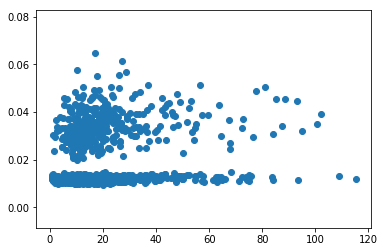

In [39]:
# visualizing correlation between cpp and cost per impression
plt.scatter(df.CPP, df.CPImp)

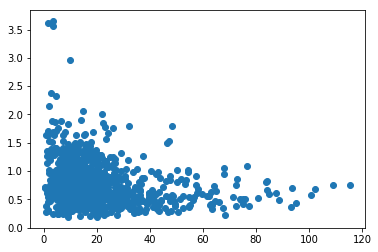

In [40]:
# same for cpp and cost per 10 second view
plt.scatter(df.CPP, df.CP10V)

In [21]:
# checking cpp averages by each creative group to see if any had a particularly higher effect than the others
df.groupby('Creative Design Style').CPP.describe()

,count,mean,std,min,25%,50%,75%,max
Creative Design Style,,,,,,,,
Graphic,712.0,18.712165,15.771622,0.81,9.525039,14.171932,22.1820,115.28
Lifestyle,585.0,17.388619,14.288573,0.64,8.855000,13.060000,20.2425,108.97


In [22]:
df.groupby('Creative Tonality').CPP.describe()

,count,mean,std,min,25%,50%,75%,max
Creative Tonality,,,,,,,,
Emotional,596.0,17.993353,15.709530,0.75,9.022143,13.289000,20.895,115.28
Rational,701.0,18.218781,14.628492,0.64,9.326667,13.686667,22.070,95.06


In [23]:
df.groupby('Creative Value Proposition').CPP.describe()

,count,mean,std,min,25%,50%,75%,max
Creative Value Proposition,,,,,,,,
"All 3: Speed, Simplicity, Ubiquity",122.0,20.373697,17.256362,1.805,9.994992,15.264454,23.619605,95.06
Simplicity,397.0,17.410765,14.621003,0.710,8.620000,12.558889,21.060000,100.82
Speed,392.0,18.755412,15.877901,0.750,9.377730,14.528958,21.681500,115.28
Ubiquity,386.0,17.475693,14.073369,0.640,9.339169,13.319000,20.374750,102.19


In [41]:
# calculating total spent so far by test cell
df.groupby('Test Cell')['Amount Spent (USD)'].sum()

Test Cell
 Cell 1     45769.17
 Cell 2     44132.47
 Cell 3     45875.41
 Cell 4     45157.96
Name: Amount Spent (USD), dtype: float64

In [33]:
# finding remaining amounts
100000 - df.groupby('Test Cell')['Amount Spent (USD)'].sum()

Test Cell
 Cell 1     54230.83
 Cell 2     55867.53
 Cell 3     54124.59
 Cell 4     54842.04
Name: Amount Spent (USD), dtype: float64

In [25]:
# looking at basic stats of cpp by test cell for overall performance. cell 1 and cell 4 to be eliminated
df.groupby('Test Cell').CPP.describe()

,count,mean,std,min,25%,50%,75%,max
Test Cell,,,,,,,,
Cell 1,392.0,18.755412,15.877901,0.750,9.377730,14.528958,21.681500,115.28
Cell 2,397.0,17.410765,14.621003,0.710,8.620000,12.558889,21.060000,100.82
Cell 3,386.0,17.475693,14.073369,0.640,9.339169,13.319000,20.374750,102.19
Cell 4,122.0,20.373697,17.256362,1.805,9.994992,15.264454,23.619605,95.06


In [35]:
# calculating new spend for cell 2 and cell 3
new_spend = round((54230.83+54842.04)/2 + 100000, 2)
new_spend

154536.43

In [45]:
df.head()

,Reporting Starts,Reporting Ends,Ad Name,Test Cell,Creative Value Proposition,Creative Tonality,Creative Design Style,Setting: Bid Type,Audience: Age,Audience: Gender,...,cvp_Ubiquity,ct_ Emotional,ct_ Rational,cds_ Graphic,cds_ Lifestyle,CPImp,CPLC,CP3V,CP10V,CPR
0,2017-01-17,2017-01-17,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,13-17,female,...,0,0,1,1,0,0.000000,NaN,NaN,NaN,NaN
1,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,female,...,0,0,1,1,0,0.011597,13.795192,0.192062,0.931623,0.020570
2,2017-01-15,2017-01-15,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,female,...,0,0,1,1,0,0.010775,13.244932,0.158220,0.663610,0.018182
3,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,45-54,female,...,0,0,1,1,0,0.012886,13.870417,0.121316,0.624559,0.019375
4,2017-01-19,2017-01-19,VCO - Usage Conversion Lift Test - Phase 4 - C...,Cell 4,"All 3: Speed, Simplicity, Ubiquity",Rational,Graphic,CPM,25-34,male,...,0,0,1,1,0,0.011823,12.239205,0.204762,0.974706,0.021333


In [50]:
# checking column names
df.columns

Index(['Reporting Starts', 'Reporting Ends', 'Ad Name', 'Test Cell',
       'Creative Value Proposition', 'Creative Tonality',
       'Creative Design Style', 'Setting: Bid Type', 'Audience: Age',
       'Audience: Gender', 'Reach', 'Amount Spent (USD)', 'Impressions',
       'Link Clicks [1 Day After Clicking]',
       'Purchases - View Based [Post Exposure to the Ad]',
       'Purchases - Click Based [Post Clicking on the Ad (subset of View Based)]',
       '3-Second Video Views', '10-Second Video Views', 'CPP',
       'total_purchases', 'cvp_All 3: Speed, Simplicity, Ubiquity',
       'cvp_Simplicity', 'cvp_Speed', 'cvp_Ubiquity', 'ct_ Emotional ',
       'ct_ Rational ', 'cds_ Graphic ', 'cds_ Lifestyle ', 'CPImp', 'CPLC',
       'CP3V', 'CP10V', 'CPR'],
      dtype='object')

In [49]:
# looking at basic cp3v stats by age demo. 65+ is lower than 55-64
df.groupby('Audience: Age').CP3V.describe()

,count,mean,std,min,25%,50%,75%,max
Audience: Age,,,,,,,,
13-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-24,337.0,0.266649,0.119801,0.070833,0.197920,0.231929,0.312110,0.9300
25-34,348.0,0.234514,0.085021,0.096842,0.177680,0.203667,0.281130,0.7550
35-44,350.0,0.189217,0.079590,0.081333,0.138706,0.162281,0.229607,0.9700
45-54,348.0,0.149621,0.070988,0.055385,0.104530,0.122308,0.184795,0.6300
55-64,348.0,0.110582,0.049536,0.036154,0.075478,0.092761,0.142521,0.2975
65+,348.0,0.099295,0.055602,0.031818,0.063872,0.079124,0.125094,0.6200


In [54]:
# purchases per 3 second video view by age
df.groupby('Audience: Age')['total_purchases'].sum()/df.groupby('Audience: Age')['3-Second Video Views'].sum()

Audience: Age
13-17         NaN
18-24    0.018666
25-34    0.022285
35-44    0.015916
45-54    0.007766
55-64    0.004465
65+      0.003798
dtype: float64

In [42]:
# looking at cost per impression by aqe group to give better recommendation. 18-24 is best here since 13-17 sample is too low
df.groupby('Audience: Age').CPImp.describe()

,count,mean,std,min,25%,50%,75%,max
Audience: Age,,,,,,,,
13-17,7.0,0.008571,0.003780,0.000000,0.010000,0.010000,0.010000,0.010000
18-24,351.0,0.016269,0.008049,0.009239,0.010729,0.011453,0.023513,0.042000
25-34,351.0,0.017708,0.009523,0.009880,0.011083,0.011751,0.027074,0.043583
35-44,351.0,0.018693,0.010356,0.010211,0.011535,0.012207,0.029071,0.057059
45-54,351.0,0.020095,0.011658,0.010606,0.012037,0.012857,0.031135,0.063846
55-64,351.0,0.021615,0.013123,0.010769,0.012583,0.013458,0.034069,0.064444
65+,351.0,0.022714,0.015005,0.010000,0.012356,0.013403,0.037104,0.066538


In [47]:
# grouping by age and gender. excluding unknown women 35-44 and 25-34 are the best group to target
df.groupby(['Audience: Age', 'Audience: Gender']).CPP.describe().sort_values(by=['mean', '50%'])

count       mean        std       min  \
Audience: Age Audience: Gender                                          
65+           unknown             3.0   0.836667   0.102632  0.750000   
55-64         unknown             6.0   1.675833   0.249728  1.260000   
18-24         unknown            16.0   2.135417   1.049460  0.690000   
45-54         unknown             8.0   3.618125   1.860526  1.930000   
35-44         unknown            19.0   5.543158   4.947282  0.640000   
25-34         unknown            26.0   5.873237   5.600805  0.820000   
35-44         female            116.0  10.692460   4.773618  4.280000   
25-34         female            117.0  11.495981   8.578279  4.071429   
              male              116.0  13.835919  10.301385  1.910000   
18-24         male              113.0  14.937087   9.578555  2.846000   
              female            115.0  15.236608   7.937493  3.141667   
35-44         male              112.0  19.191695  12.029755  2.212143   
65+           male               56.0  19.469202  13.809052  3.448000   
45-54         female            113.0  20.183993  14.163981  5.075455   
65+           female             90.0  25.313408  19.703613  5.945000   
55-64         female            106.0  26.113565  18.517290  3.415000   
              male               68.0  28.918276  15.768104  6.210000   
45-54         male               97.0  30.907802  23.148296  7.420000   
13-17         female              0.0        NaN        NaN       NaN   
              male                0.0        NaN        NaN       NaN   

                                      25%        50%        75%      max  
Audience: Age Audience: Gender                                            
65+           unknown            0.780000   0.810000   0.880000    0.950  
55-64         unknown            1.560000   1.757500   1.823750    1.940  
18-24         unknown            1.290000   1.903333   2.930000    4.220  
45-54         unknown            2.237500   2.770000   4.941250    7.080  
35-44         unknown            2.067500   3.375000   7.800000   16.410  
25-34         unknown            2.408750   3.520000   6.347500   22.230  
35-44         female             7.090737   9.246574  13.201071   31.670  
25-34         female             7.008095   9.195714  12.402353   54.435  
              male               9.222679  11.767603  14.633393   84.060  
18-24         male               9.105714  12.292500  17.430000   58.090  
              female            10.642429  13.177059  18.208000   67.810  
35-44         male              11.547500  16.101071  23.255000   76.610  
65+           male               8.119583  17.685000  27.637500   67.510  
45-54         female            11.522222  16.130000  23.085000   87.620  
65+           female            11.972381  19.580000  29.067500   93.025  
55-64         female            13.400655  19.906905  34.334750  102.190  
              male              17.895000  25.897500  36.945000   95.060  
45-54         male              15.710000  20.908095  40.680000  115.280  
13-17         female                  NaN        NaN        NaN      NaN  
              male                    NaN        NaN        NaN      NaN

In [51]:
# seeing a huge number of gender values are unknown
df['Audience: Gender'].value_counts()

female     707
male       704
unknown    702
Name: Audience: Gender, dtype: int64

In [58]:
# checking performance of each creative
df.groupby('Ad Name').CPP.describe().sort_values(by=['mean', '50%'])

,count,mean,std,min,25%,50%,75%,max
Ad Name,,,,,,,,
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Emotional - Graphic - CPM,76.0,14.321504,10.109874,0.950000,8.539667,11.649286,18.042083,64.410
VCO - Usage Conversion Lift Test - Phase 1 - Cell 3 - Merch - Emotional - Graphic - CPM,69.0,14.582120,10.054991,0.810000,8.025937,12.660500,18.500000,54.640
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Rational - Lifestyle - CPM,65.0,14.770450,12.384006,0.710000,6.990323,9.891250,15.709091,61.360
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Rational - Graphic - CPM,70.0,15.852234,9.416454,2.375000,9.240787,14.113500,20.130000,44.020
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Rational - Graphic - CPM,62.0,15.991423,13.090396,1.805000,8.166827,11.174000,21.141250,83.710
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Lifestyle,28.0,16.417315,7.956166,7.132500,9.528929,14.736905,21.115000,40.710
VCO - Usage Conversion Lift Test - Phase 1 - Cell 3 - Merch - Rational - Lifestyle - CPM,68.0,16.665622,13.544471,0.640000,8.526563,12.205202,19.267417,65.910
VCO - Usage Conversion Lift Test - Phase 1 - Cell 3 - Merch - Rational - Lifestyle,28.0,16.667008,10.748979,2.846000,8.870625,13.091905,23.967500,44.085
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Lifestyle - CPM,67.0,17.162553,17.907135,0.750000,8.290000,11.170000,18.881667,108.970


In [54]:
# looking at spend on each ad
df.groupby('Ad Name')['Amount Spent (USD)'].sum()

Ad Name
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Graphic               2428.76
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Graphic - CPM         8953.72
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Lifestyle             2473.67
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Lifestyle - CPM       9000.99
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Rational - Graphic                2437.68
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Rational - Graphic - CPM          9010.20
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Rational - Lifestyle              2469.53
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Rational - Lifestyle - CPM        8994.62
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Emotional - Graphic               2398.33
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Emotional - Gr

In [50]:
# examining performance by ad name and gender. sample sizes are relatively low so hard to come to a conclusion here
pd.set_option('display.max_rows', 100)
df.groupby(['Ad Name', 'Audience: Gender']).CPP.describe().sort_values(by=['mean', '50%'])

,,count,mean,std,min,25%,50%,75%,max
Ad Name,Audience: Gender,,,,,,,,
VCO - Usage Conversion Lift Test - Phase 1 - Cell 3 - Merch - Rational - Lifestyle - CPM,unknown,4.0,0.915000,0.403856,0.640000,0.677500,0.755000,0.992500,1.510000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Rational - Lifestyle,unknown,1.0,1.360000,NaN,1.360000,1.360000,1.360000,1.360000,1.360000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Rational - Lifestyle,unknown,1.0,1.510000,NaN,1.510000,1.510000,1.510000,1.510000,1.510000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Rational - Lifestyle - CPM,unknown,3.0,1.646667,0.945110,0.710000,1.170000,1.630000,2.115000,2.600000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 3 - Merch - Rational - Graphic - CPM,unknown,3.0,1.816667,0.999016,1.220000,1.240000,1.260000,2.115000,2.970000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Graphic - CPM,unknown,3.0,1.913333,0.028868,1.880000,1.905000,1.930000,1.930000,1.930000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 1 - SSI - Emotional - Lifestyle - CPM,unknown,4.0,2.005000,0.843702,0.750000,1.890000,2.380000,2.495000,2.510000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 2 - LFF - Rational - Graphic,unknown,1.0,2.140000,NaN,2.140000,2.140000,2.140000,2.140000,2.140000
VCO - Usage Conversion Lift Test - Phase 1 - Cell 3 - Merch - Emotional - Graphic - CPM,unknown,5.0,2.205333,2.018405,0.810000,1.340000,1.406667,1.700000,5.770000
